In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy


In [3]:
df = pd.read_csv("shops.csv")
df.head()

,food,price,store,origin
0,chocolate,100.30,supermarket,russia
1,chocolate,55.57,minimarket,russia
2,chocolate,268.62,minimarket,import
3,chocolate,196.81,supermarket,import
4,bread,10.91,minimarket,russia


In [4]:
df.shape

(20, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   food    20 non-null     object 
 1   price   20 non-null     float64
 2   store   20 non-null     object 
 3   origin  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


In [6]:
for col in df.columns:
    if col != 'price':
        print(f"{col} unique vals are: {df[col].unique()}")

food unique vals are: ['chocolate' 'bread' 'vegetables' 'fruits' 'cheese']
store unique vals are: ['supermarket' 'minimarket']
origin unique vals are: ['russia' 'import']


price - зависимая переменная, остальные - независимые 

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_96649/3444248499.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_col_vals)


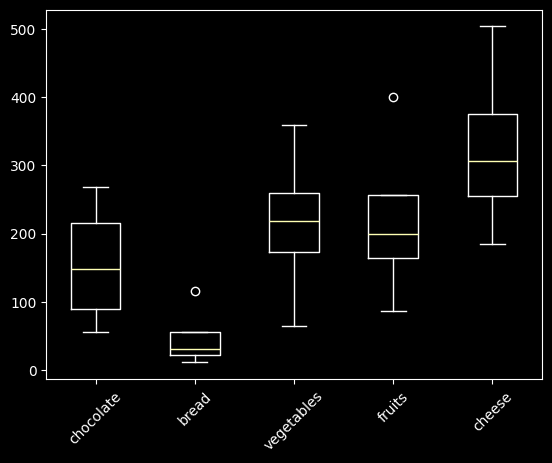

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_96649/3444248499.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_col_vals)


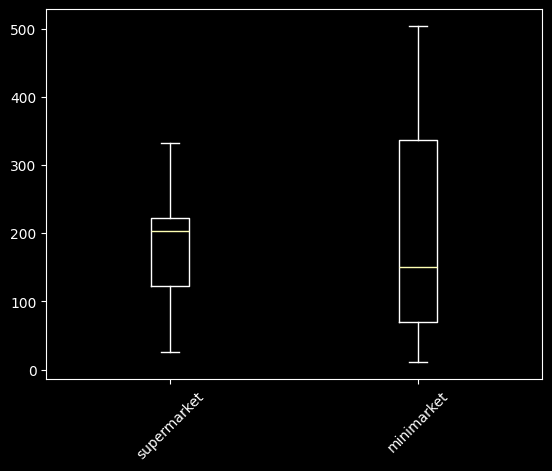

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_96649/3444248499.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_col_vals)


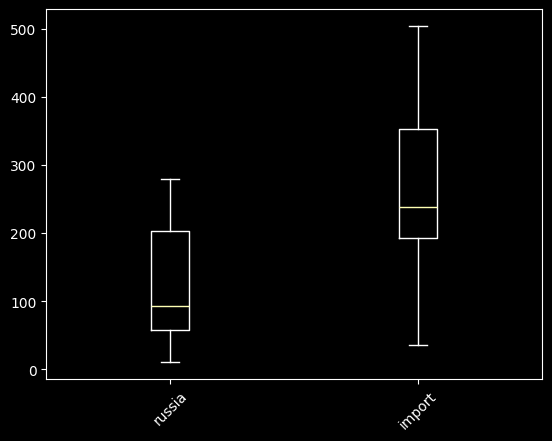

In [7]:
for col in df.columns:
    if col == 'price':
        continue
    
    unique_col_vals = df[col].unique()
    data = [df[df[col] == val]['price'] for val in unique_col_vals]

    plt.boxplot(data, labels=unique_col_vals)
    plt.xticks(rotation=45)
    plt.show()

Сформируем числовые данные по группам

In [8]:
from scipy import stats

for col in df.columns:
    if col == 'price':
        continue
    print(f"{col=}")
    grouped_prices = df.groupby(col)['price'].apply(lambda x: np.array(x))
    bartlett_test = stats.bartlett(*grouped_prices)
    print(bartlett_test)
    for prices in grouped_prices:
        shapiro_test = stats.shapiro(prices)
        print(shapiro_test, end='\n')

    f_stat, p = stats.f_oneway(*grouped_prices)

    print(f"{f_stat=}, {p=}")


col='food'
BartlettResult(statistic=np.float64(2.878138644422655), pvalue=np.float64(0.5784213012140524))
ShapiroResult(statistic=np.float64(0.8197216894349117), pvalue=np.float64(0.142550008751442))
ShapiroResult(statistic=np.float64(0.9682779324377635), pvalue=np.float64(0.8307919609578589))
ShapiroResult(statistic=np.float64(0.9586891558198813), pvalue=np.float64(0.770659545256112))
ShapiroResult(statistic=np.float64(0.9322503998367382), pvalue=np.float64(0.6076881279492681))
ShapiroResult(statistic=np.float64(0.9675825458236849), pvalue=np.float64(0.8264607309625561))
f_stat=np.float64(3.3977807766676675), p=np.float64(0.03617523023287855)
col='store'
BartlettResult(statistic=np.float64(2.3226976328888895), pvalue=np.float64(0.1274987430028706))
ShapiroResult(statistic=np.float64(0.9119603980685513), pvalue=np.float64(0.2947302108464031))
ShapiroResult(statistic=np.float64(0.9253359830226551), pvalue=np.float64(0.40361273494915))
f_stat=np.float64(0.1551431529821821), p=np.float64(

Заметим, что: 
- для food   p < 0.05, значит, существуют статистически значимые различия в цене между разными типами продуктов.
- для store  p > 0.05, значит, тип магазина не влияет на цену.
- для origin p < 0.05, значит, страна происхождения оказывает значимое влияние на цену.

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_96649/1999068422.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_96649/1999068422.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(


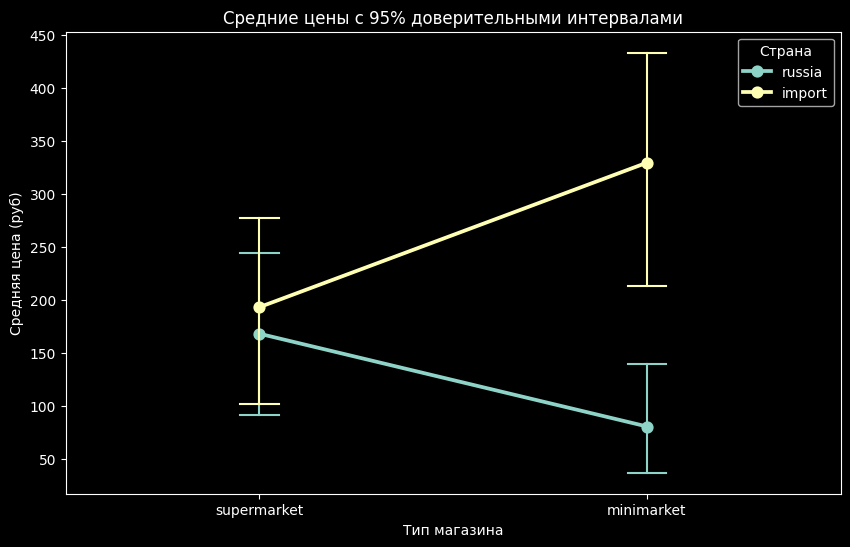

In [9]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df,
    x='store',
    y='price',
    hue='origin',
    ci=95,
    capsize=0.1,
    errwidth=1.5
)
plt.title("Средние цены с 95% доверительными интервалами")
plt.xlabel("Тип магазина")
plt.ylabel("Средняя цена (руб)")
plt.legend(title="Страна")
plt.show()

In [10]:
from statsmodels.formula.api import ols

In [13]:
import statsmodels.api as sm

model = ols('price ~ C(store) + C(origin) + C(store):C(origin)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq    df         F    PR(>F)
C(store)              2980.949445   1.0  0.252394  0.622238
C(origin)            94106.852405   1.0  7.967925  0.012252
C(store):C(origin)   62777.133005   1.0  5.315272  0.034867
Residual            188971.368040  16.0       NaN       NaN


**Нет статистически значимого влияния типа магазина (супермаркет/минимаркет) на цену (p > 0.05);**

**Страна производства значимо влияет на цену (p < 0.05). Импортные товары в среднем отличаются по цене от российских**

**Взаимодействие факторов (C(store):C(origin)):   Обнаружено статистически значимое взаимодействие (p < 0.05). Это означает, что:Влияние типа магазина на цену зависит от страны производства.**                                               
**Или: влияние страны на цену зависит от типа магазина.**

In [ ]:
from scipy.stats import tukey_hsd

H₀:
Средние цены не различаются между разными типами продуктов

H₁:
Средние цены различаются хотя бы для одной пары типов продуктов

In [14]:
from scipy.stats import f_oneway

product_groups = [df[df['food'] == product]['price']
                 for product in df['food'].unique()]

# ANOVA
f_stat, p_value = f_oneway(*product_groups)
print(f"Результаты ANOVA для типа продукта:\nF = {f_stat:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Есть статистически значимые различия между группами продуктов")
else:
    print("Значимых различий не обнаружено")

Результаты ANOVA для типа продукта:
F = 3.398, p-value = 0.0362
Есть статистически значимые различия между группами продуктов


- так как p-value = 0.0362 < 0.05, следовательно, цены различаются хотя бы для одной пары типов продуктов, отвергаем нулевую гипотезу H0, принимаем первую H1
- Из этого можно сделать вывод, что тип продаваемой продукции влияет на ценообразование

In [ ]:
from scipy.stats import tukey_hsd

prices_by_product = {
    food: df[df['food'] == food]['price'].values for food in df['food'].unique()
}
tukey_results = tukey_hsd(*prices_by_product.values())

print(tukey_results)

[100.3   55.57 268.62 196.81] [ 10.91  25.84  35.44 116.23] [ 64.93 226.39 209.15 359.  ] [ 85.84 191.07 208.59 400.17] [184.56 278.86 333.21 504.  ]
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    108.220     0.645  -132.963   349.403
 (0 - 2)    -59.543     0.938  -300.726   181.641
 (0 - 3)    -66.093     0.912  -307.276   175.091
 (0 - 4)   -169.833     0.241  -411.016    71.351
 (1 - 0)   -108.220     0.645  -349.403   132.963
 (1 - 2)   -167.762     0.251  -408.946    73.421
 (1 - 3)   -174.312     0.221  -415.496    66.871
 (1 - 4)   -278.053     0.020  -519.236   -36.869
 (2 - 0)     59.543     0.938  -181.641   300.726
 (2 - 1)    167.762     0.251   -73.421   408.946
 (2 - 3)     -6.550     1.000  -247.733   234.633
 (2 - 4)   -110.290     0.630  -351.473   130.893
 (3 - 0)     66.093     0.912  -175.091   307.276
 (3 - 1)    174.312     0.221   -66.871   415.496
 (3 - 2)      6.550     1.000  -

**Вывод**

Единственное статистически значимое различие обнаружено между: Хлеб (1) и Сыр (3) (p-value = 0.020 < 0.05)

Все остальные пары продуктов не показали значимых различий (p-value > 0.05)